## Spam Detection from spam Dataset

##### The dataset contains comments and the tags associated with it stating whether the comment is spam or ham.
##### The detection of spam needs to be done






##### Import Libraries

In [1]:
## Import all the libraries required
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
nltk.download('wordnet')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Dexter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Dexter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
## read the data
spam_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv",encoding='latin-1')

In [3]:
##### fill the null values and merge multiple columns
spam_data.fillna("",inplace=True)
spam_data['comment']=spam_data['v2']+spam_data['Unnamed: 2']+spam_data['Unnamed: 3']+spam_data['Unnamed: 4']
spam_data.drop(['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

##### The distribution of the Target value. 

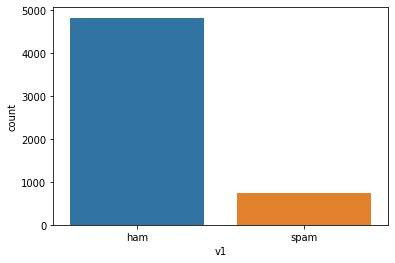

In [4]:
sns.countplot(spam_data['v1'])

##### the target class is imbalanced as we see in the plot above

##### Preprocessing of the text

A function is defined that can do the below.
- the stop words are to be removed
- the punctuations are removed
- The base words are found.
- Word tokens are Vectorized


In [5]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [8]:
## preprocessing to remove the punctuations, stopwords and finding the base words
def preprocess_text(doc):
    
    #1 Remove Punctuationa
    rempunc = [char for char in doc if char not in string.punctuation]
    rempunc = ''.join(rempunc)
    
    #2 Remove Stop Words
    reqwords = [word for word in rempunc.split() if word.lower() not in stopwords.words('english')]
    
    l=[]
    for i in reqwords:
        a=lemmatizer.lemmatize(i)
        l.append(a)
    finalwords=l
    #3 Return a list of clean words
    return finalwords


In [9]:
spam_data['comment'].head().apply(preprocess_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, go, usf, life, around, though]
Name: comment, dtype: object

In [10]:
ham_set=spam_data[spam_data['v1']=='ham']
spam_set=spam_data[spam_data['v1']=='spam']

In [11]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

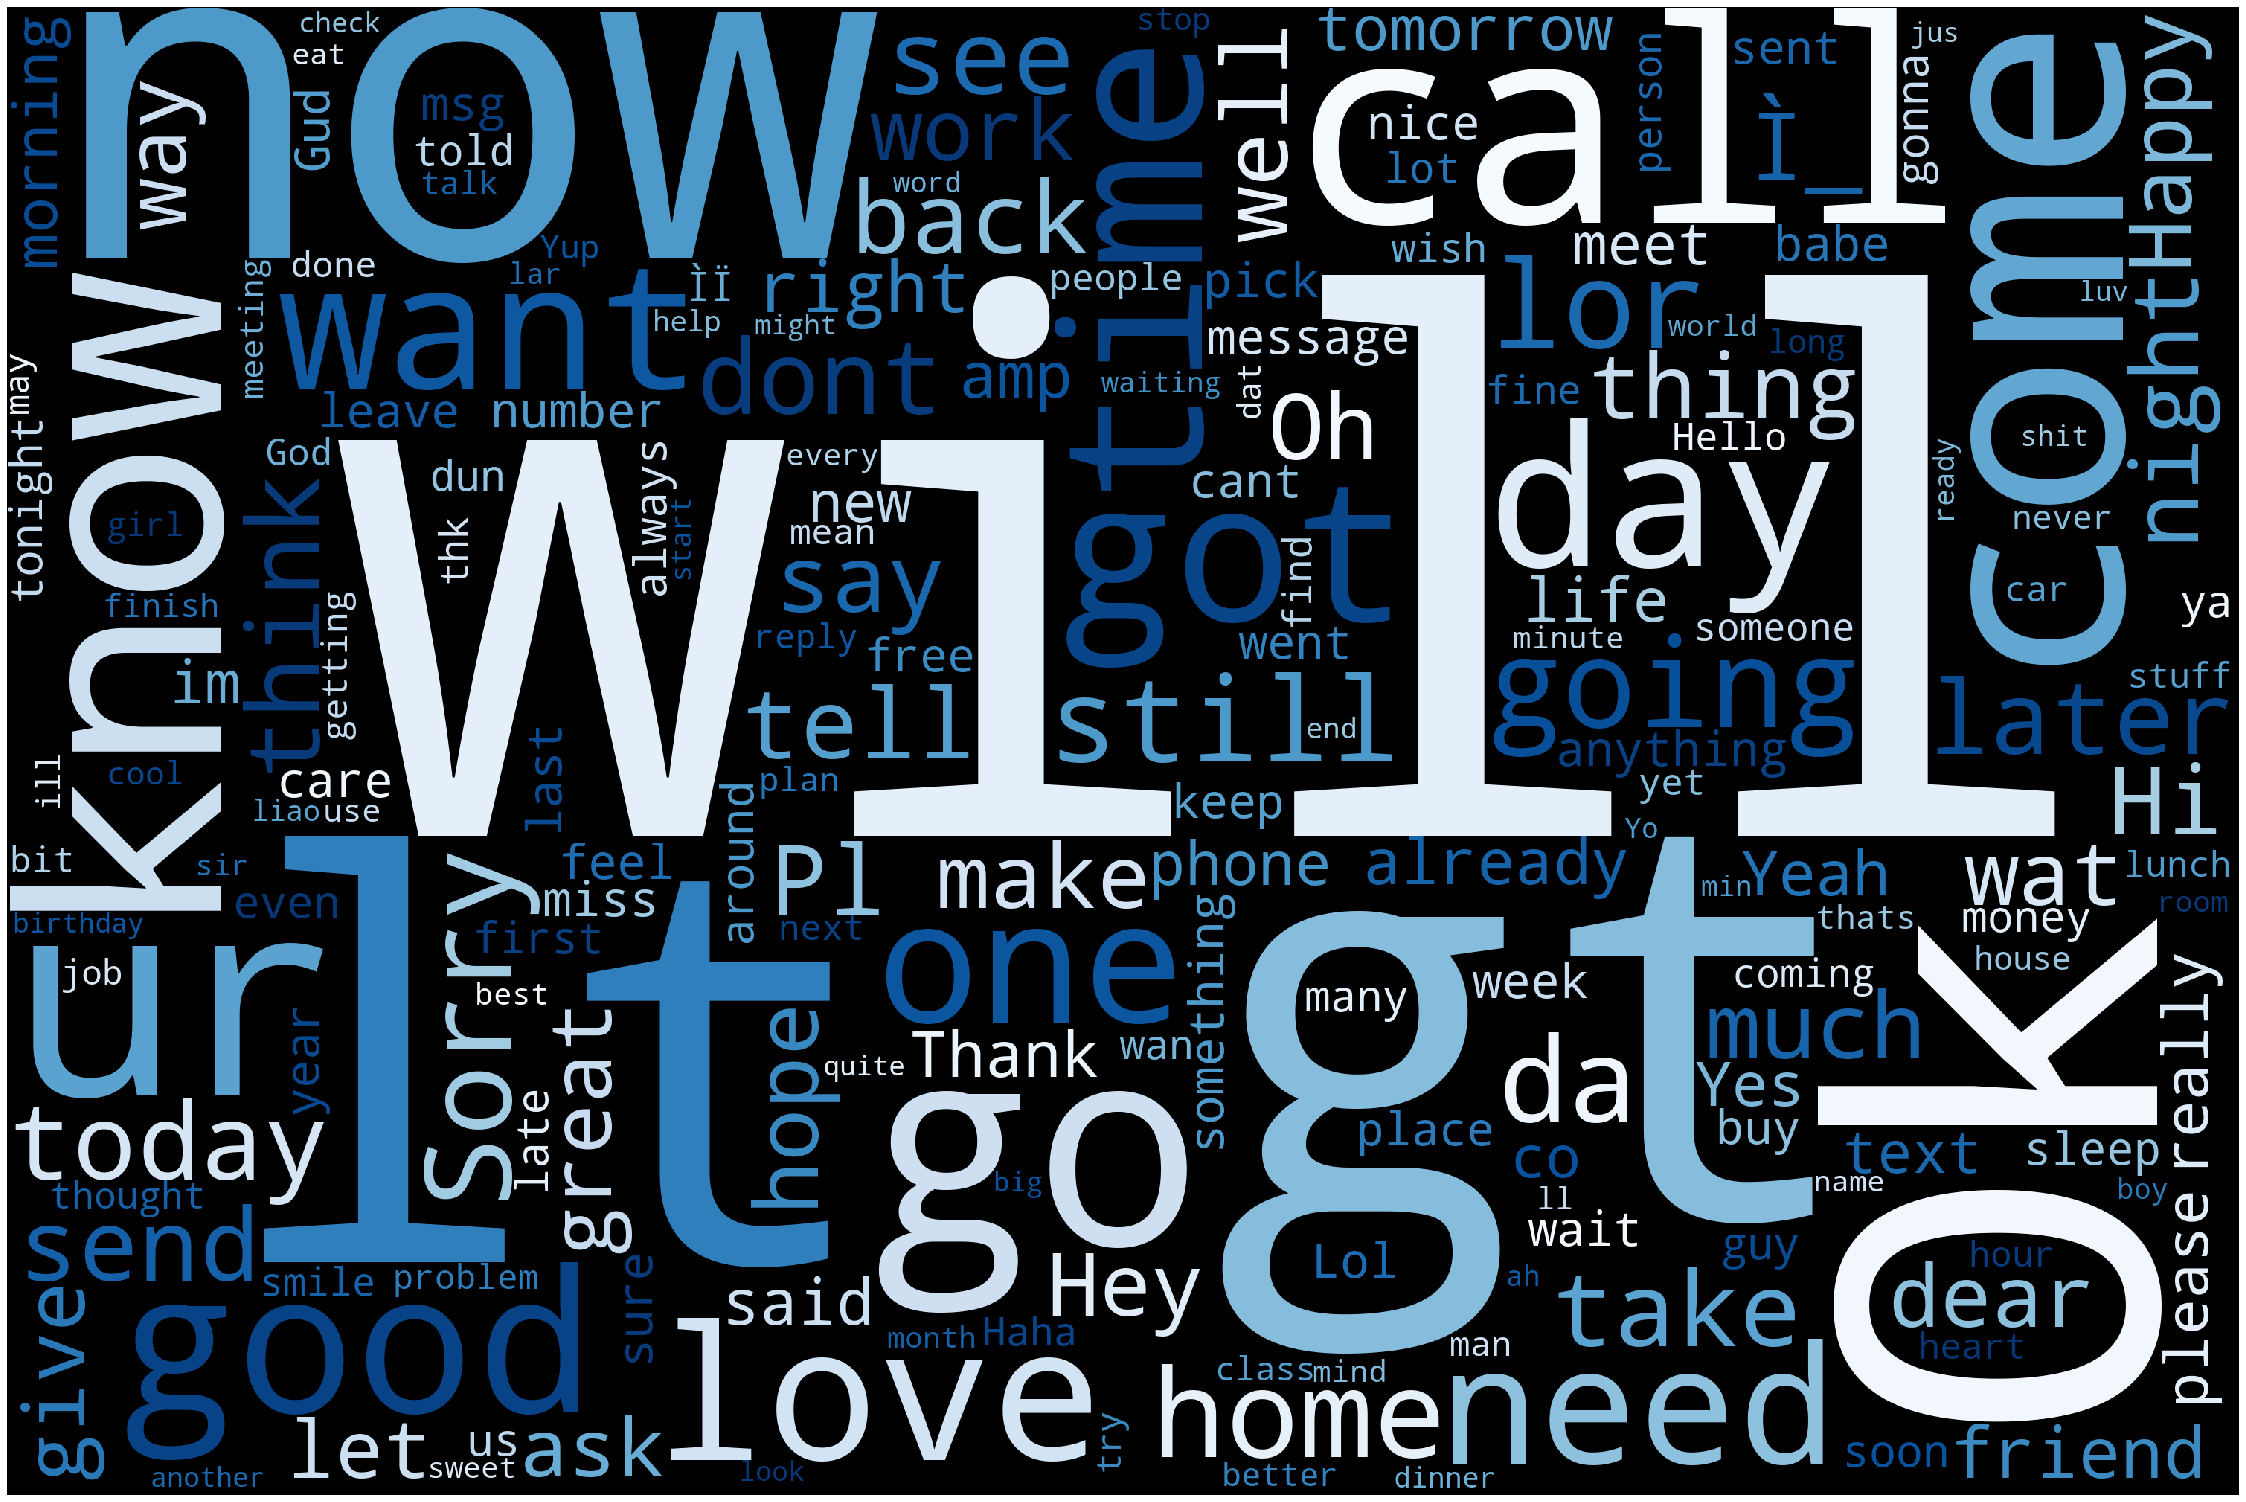

In [12]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap="Blues", collocations=False, stopwords = STOPWORDS).generate(' '.join(ham_set['comment']))
# Plot
plot_cloud(wordcloud)

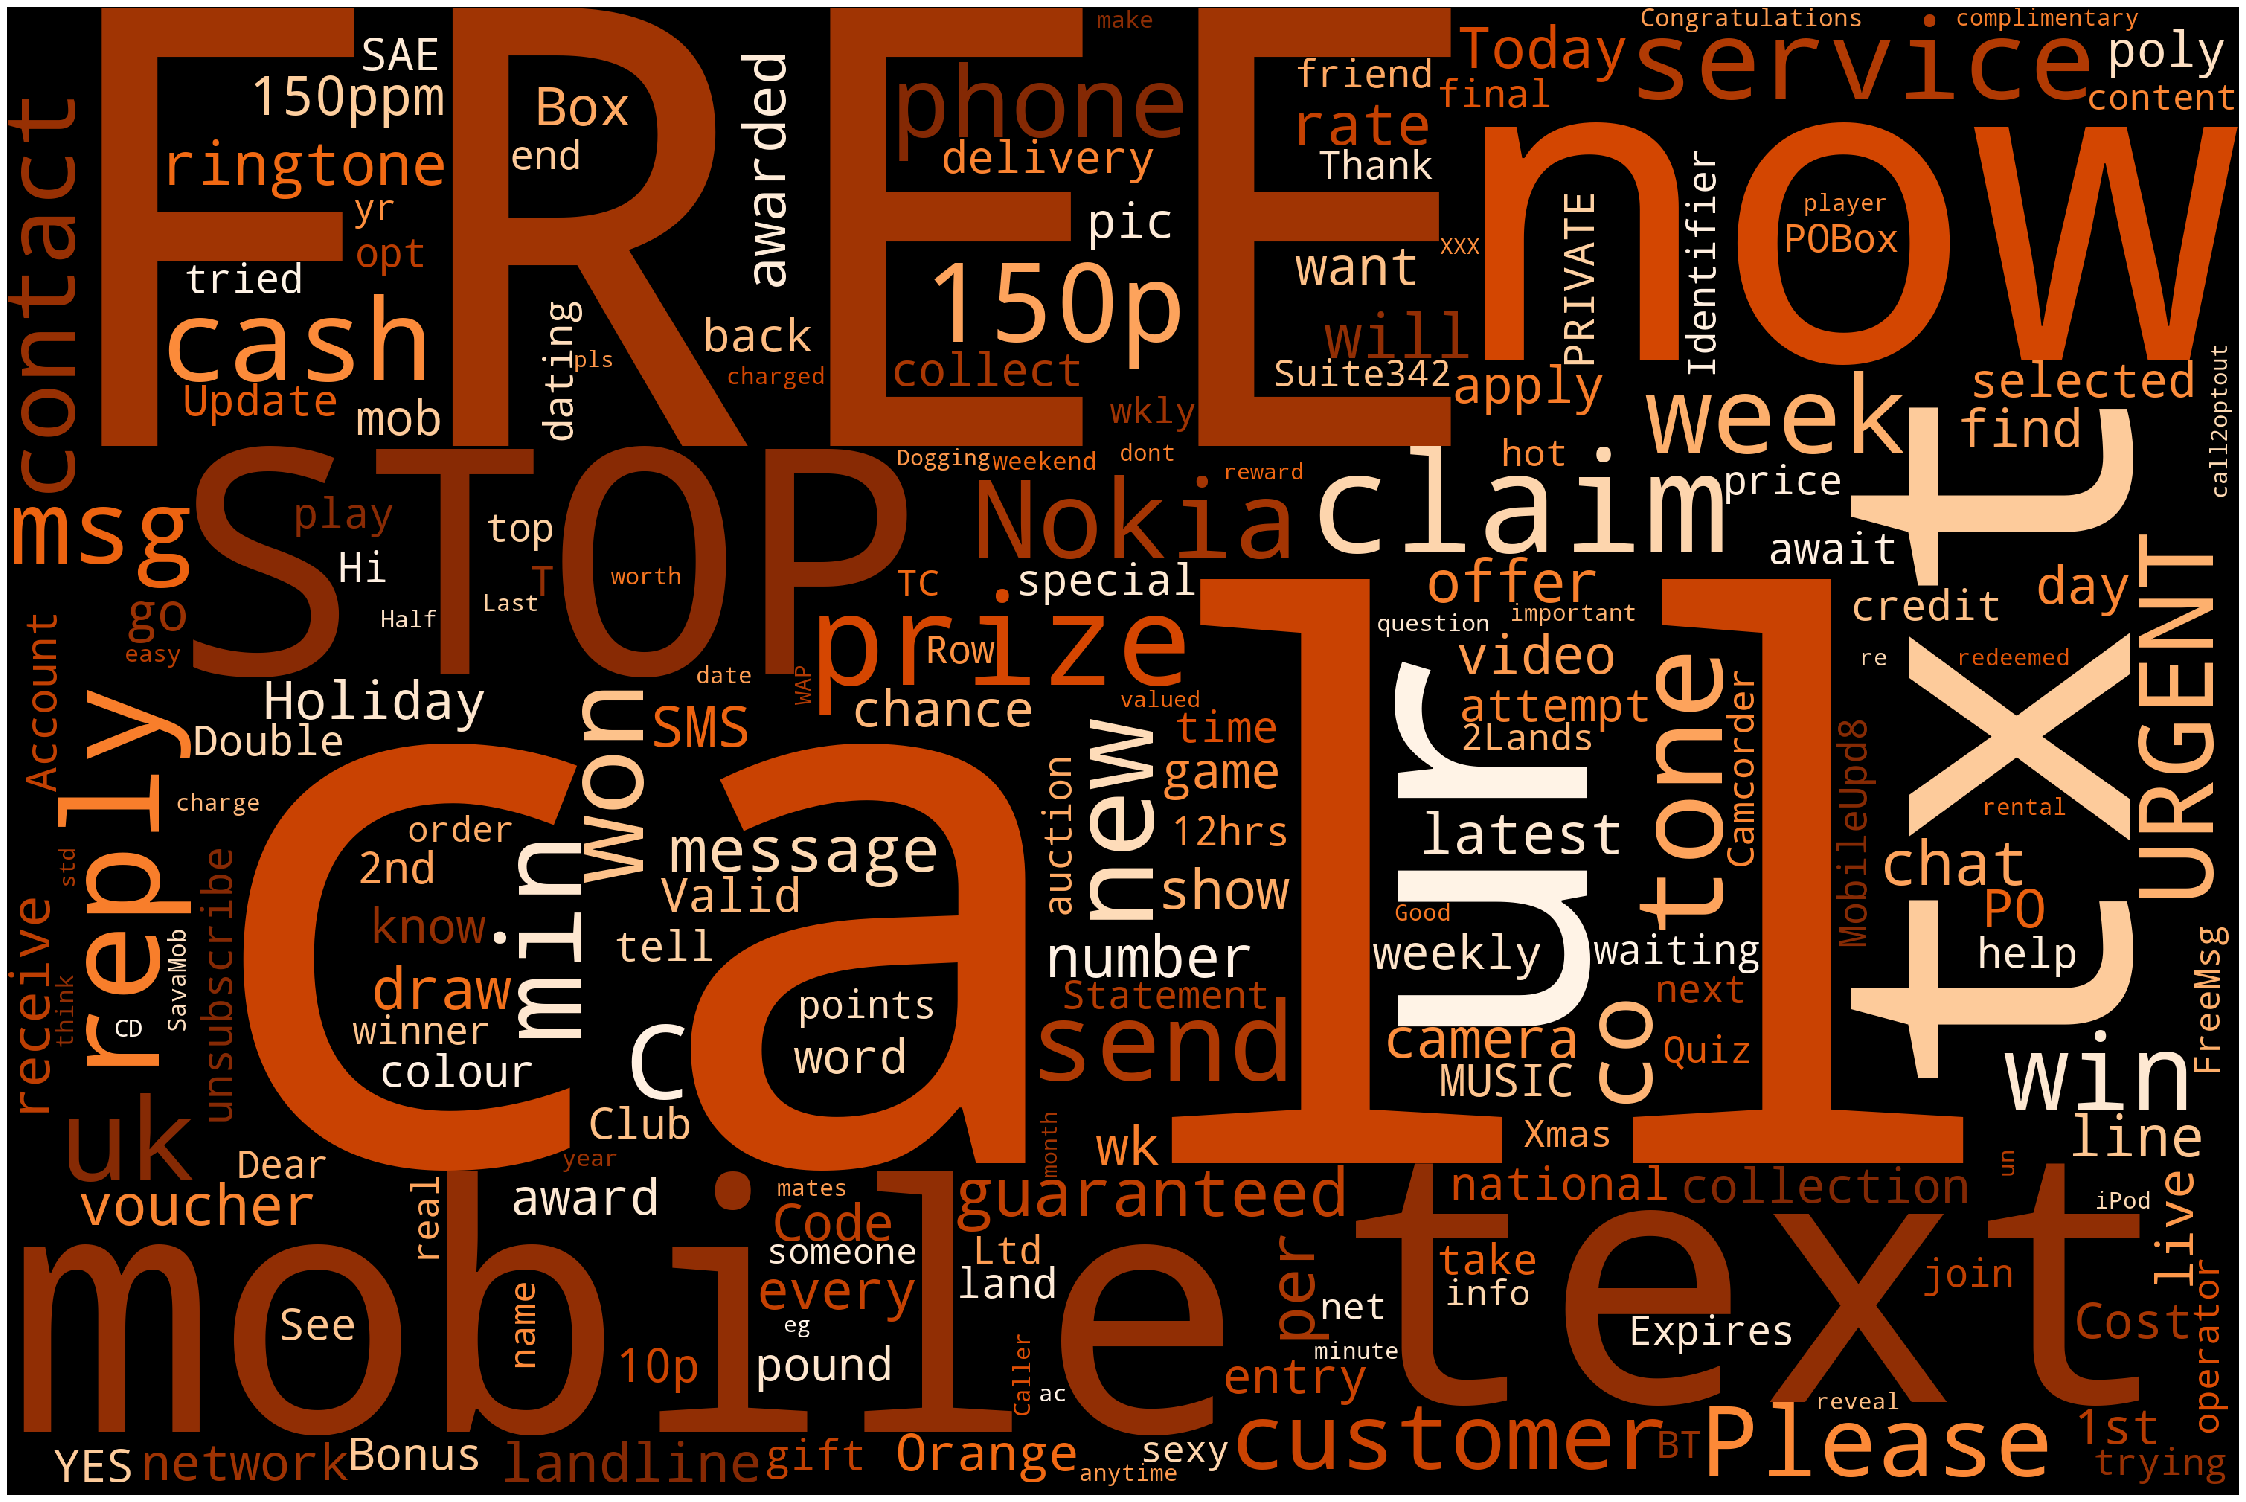

In [13]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap="Oranges", collocations=False, stopwords = STOPWORDS).generate(' '.join(spam_set['comment']))
# Plot
plot_cloud(wordcloud)

#### Most frequent words in spam looks like are "free","call","mobile","text" etc. whereas in Ham its "will","got","ok"

#### train test split

In [14]:
#Split data into 80% training & 20% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam_data['comment'], spam_data['v1'], test_size = 0.20, random_state = 0)

#### vectorization of the text

##### The above preprocessed text is to be vectorized. Count vecotorizer is used in this case

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer=preprocess_text)
X_train = cv.fit_transform(X_train)

In [17]:
X_test=cv.transform(X_test)

##### Target class is imbalanced, so its good to use Naive Bayes here.. We will compare this against Random Forest

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("-----Train-----")
print(nb.predict(X_train))
print(y_train.values)
pred = nb.predict(X_train)
print("Classification Report Train: \n",classification_report(y_train ,pred ))
print('Confusion Matrix Train: \n',confusion_matrix(y_train,pred))
print('Accuracy Train: ', accuracy_score(y_train,pred))
## predictions
print("-----Test-----")
print('Predicted value Test: ',nb.predict(X_test))
print('Actual value Test: ',y_test.values)
pred = nb.predict(X_test)
print("Classification Report Test: \n",classification_report(y_test ,pred ))
print('Confusion Matrix Test: \n', confusion_matrix(y_test,pred))
print('Accuracy Test: ', accuracy_score(y_test,pred))

-----Train-----
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Classification Report Train: 
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       0.97      0.98      0.98       581

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457

Confusion Matrix Train: 
 [[3861   15]
 [  12  569]]
Accuracy Train:  0.9939421135292797
-----Test-----
Predicted value Test:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Actual value Test:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Classification Report Test: 
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       949
        spam       0.96      0.91      0.93       166

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted 

##### An accuracy of 98% is achieved using Naive Bayes. Random forest is used below to see how that is performing

In [19]:
## Random Forest
rf = RandomForestClassifier(class_weight="balanced",random_state=20)
rf.fit(X_train, y_train)
print("----Train----")
print(rf.predict(X_train))
print(y_train.values)

pred = rf.predict(X_train)
print("Classification Report Train: \n",classification_report(y_train ,pred ))
print('Confusion Matrix Train: \n',confusion_matrix(y_train,pred))
print('Accuracy Train: ', accuracy_score(y_train,pred))

print("----Test----")
print('Predicted value: ',rf.predict(X_test))
print('Actual value: ',y_test.values)
pred = rf.predict(X_test)
print("Classification Report Test: \n",classification_report(y_test ,pred ))
print('Confusion Matrix Test: \n', confusion_matrix(y_test,pred))
print('Accuracy Test: ', accuracy_score(y_test,pred))

----Train----
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Classification Report Train: 
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       1.00      1.00      1.00       581

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

Confusion Matrix Train: 
 [[3876    0]
 [   0  581]]
Accuracy Train:  1.0
----Test----
Predicted value:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Actual value:  ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Classification Report Test: 
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       1.00      0.77      0.87       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97     

##### As we see Naive Bayes is performing better in this case. Also, is not overfitting since we see the Train and Test accuarcy in accordance. This is possibly because Naive Bayes is not affected by imbalanced class.
##### Random Forest is overfitting and is also getting less test accuracy

#### Naive Bayes worked well and is able to detect spam efficiently